In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, LeaveOneOut, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_source = 'C:/Users/BiSBII/Documents/MM_ML/data/DIABLO_INPUT'

In [3]:
Xtrain_RNASeq = pd.read_csv(os.path.join(data_source, 'XTRAIN_RNASEQ_MODEL_500_GENES_NOREPS.csv'), index_col=0)

In [4]:
Xtrain_mets = pd.read_csv(os.path.join(data_source, 'XTRAIN_METABOLOMICS_NOREPS.csv'), index_col=0)

In [5]:
Xtrain_fluxes = pd.read_csv(os.path.join(data_source, 'XTRAIN_FLUXOMICS_500_REACTIONS.csv'), index_col=0)

In [6]:
all_data = pd.concat([Xtrain_RNASeq, Xtrain_mets, Xtrain_fluxes], axis=1)
all_data.shape

(58, 1212)

In [7]:
vt = VarianceThreshold(0)
data_filtered = vt.fit_transform(all_data)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=all_data.index, columns=all_data.columns[cols_inds])
df_data_filtered.shape

(58, 1208)

In [93]:
corr = df_data_filtered.corr()
corr.shape

(1208, 1208)

In [87]:
corr.iloc[:20, :20]

,Vitvi00g04041,Vitvi00g04869,Vitvi01g00115,Vitvi01g00140,Vitvi01g00214,Vitvi01g00343,Vitvi01g00362,Vitvi01g00457,Vitvi01g00589,Vitvi01g00619,Vitvi01g00620,Vitvi01g00621,Vitvi01g00647,Vitvi01g00662,Vitvi01g00672,Vitvi01g00711,Vitvi01g00738,Vitvi01g00800,Vitvi01g01035,Vitvi01g01296
Vitvi00g04041,0.000000,0.873722,0.842441,0.879757,0.906380,-0.893014,-0.870300,0.827423,0.900255,-0.856726,-0.875365,-0.865738,0.900426,0.889999,-0.814400,0.904294,0.904580,0.842173,0.909280,0.875033
Vitvi00g04869,0.873722,0.000000,0.782653,0.918056,0.926208,-0.861005,-0.874634,0.901337,0.926085,-0.851276,-0.869975,-0.874683,0.903440,0.830142,-0.802508,0.868865,0.898827,0.834697,0.875256,0.845411
Vitvi01g00115,0.842441,0.782653,0.000000,0.872320,0.913523,-0.930450,-0.930265,0.790454,0.881115,-0.918611,-0.896433,-0.916825,0.837369,0.938630,-0.812311,0.852796,0.834340,0.868658,0.900572,0.783145
Vitvi01g00140,0.879757,0.918056,0.872320,0.000000,0.980674,-0.918430,-0.907174,0.947917,0.960296,-0.905772,-0.895870,-0.912340,0.930628,0.908101,-0.873506,0.916715,0.954631,0.936599,0.923970,0.924635
Vitvi01g00214,0.906380,0.926208,0.913523,0.980674,0.000000,-0.958676,-0.948918,0.946852,0.973875,-0.937090,-0.927845,-0.945630,0.942214,0.935668,-0.882389,0.937893,0.959712,0.927973,0.956876,0.916780
Vitvi01g00343,-0.893014,-0.861005,-0.930450,-0.918430,-0.958676,0.000000,0.960339,-0.865439,-0.946776,0.917289,0.912604,0.923239,-0.917712,-0.899092,0.842430,-0.931708,-0.914491,-0.865017,-0.947555,-0.879046
Vitvi01g00362,-0.870300,-0.874634,-0.930265,-0.907174,-0.948918,0.960339,0.000000,-0.858574,-0.941588,0.898196,0.895413,0.918732,-0.932411,-0.902371,0.772596,-0.936031,-0.886696,-0.831602,-0.942994,-0.828054
Vitvi01g00457,0.827423,0.901337,0.790454,0.947917,0.946852,-0.865439,-0.858574,0.000000,0.921765,-0.895161,-0.876917,-0.905267,0.891020,0.862040,-0.909383,0.870842,0.953027,0.905212,0.898945,0.918248
Vitvi01g00589,0.900255,0.926085,0.881115,0.960296,0.973875,-0.946776,-0.941588,0.921765,0.000000,-0.910573,-0.909189,-0.925371,0.958091,0.909260,-0.848009,0.963243,0.956997,0.891322,0.969103,0.927148
Vitvi01g00619,-0.856726,-0.851276,-0.918611,-0.905772,-0.937090,0.917289,0.898196,-0.895161,-0.910573,0.000000,0.989711,0.993230,-0.846969,-0.922675,0.930009,-0.857366,-0.908308,-0.870938,-0.905645,-0.845398


In [68]:
corr.to_csv(os.path.join(data_source, 'correlations_python.csv'))

In [94]:
np.fill_diagonal(corr.values, 0)

In [107]:
to_keep = [c for c in corr.columns if not c.startswith('Vit')]

genes = [i for i in corr.index if i.startswith('Vit')]

genes_vs_others = corr.loc[genes, to_keep]

In [108]:
genes_vs_others.shape

(500, 708)

In [109]:
corr_filter = genes_vs_others[genes_vs_others[abs(genes_vs_others) > 0.90].any(axis=1)]

corr_filter.shape

(440, 708)

In [110]:
corr_filter2 = corr_filter[corr_filter.columns[abs(corr_filter.max()) > 0.90]]

corr_filter2.shape

(440, 453)

In [116]:
corr_filter2.index

Index(['Vitvi00g04041', 'Vitvi00g04869', 'Vitvi01g00140', 'Vitvi01g00214',
       'Vitvi01g00343', 'Vitvi01g00362', 'Vitvi01g00457', 'Vitvi01g00589',
       'Vitvi01g00619', 'Vitvi01g00620',
       ...
       'Vitvi19g01058', 'Vitvi19g01352', 'Vitvi19g01432', 'Vitvi19g01479',
       'Vitvi19g01692', 'Vitvi19g01739', 'Vitvi19g01741', 'Vitvi19g01793',
       'Vitvi19g02324', 'Vitvi19g04395'],
      dtype='object', length=440)

<Axes: >

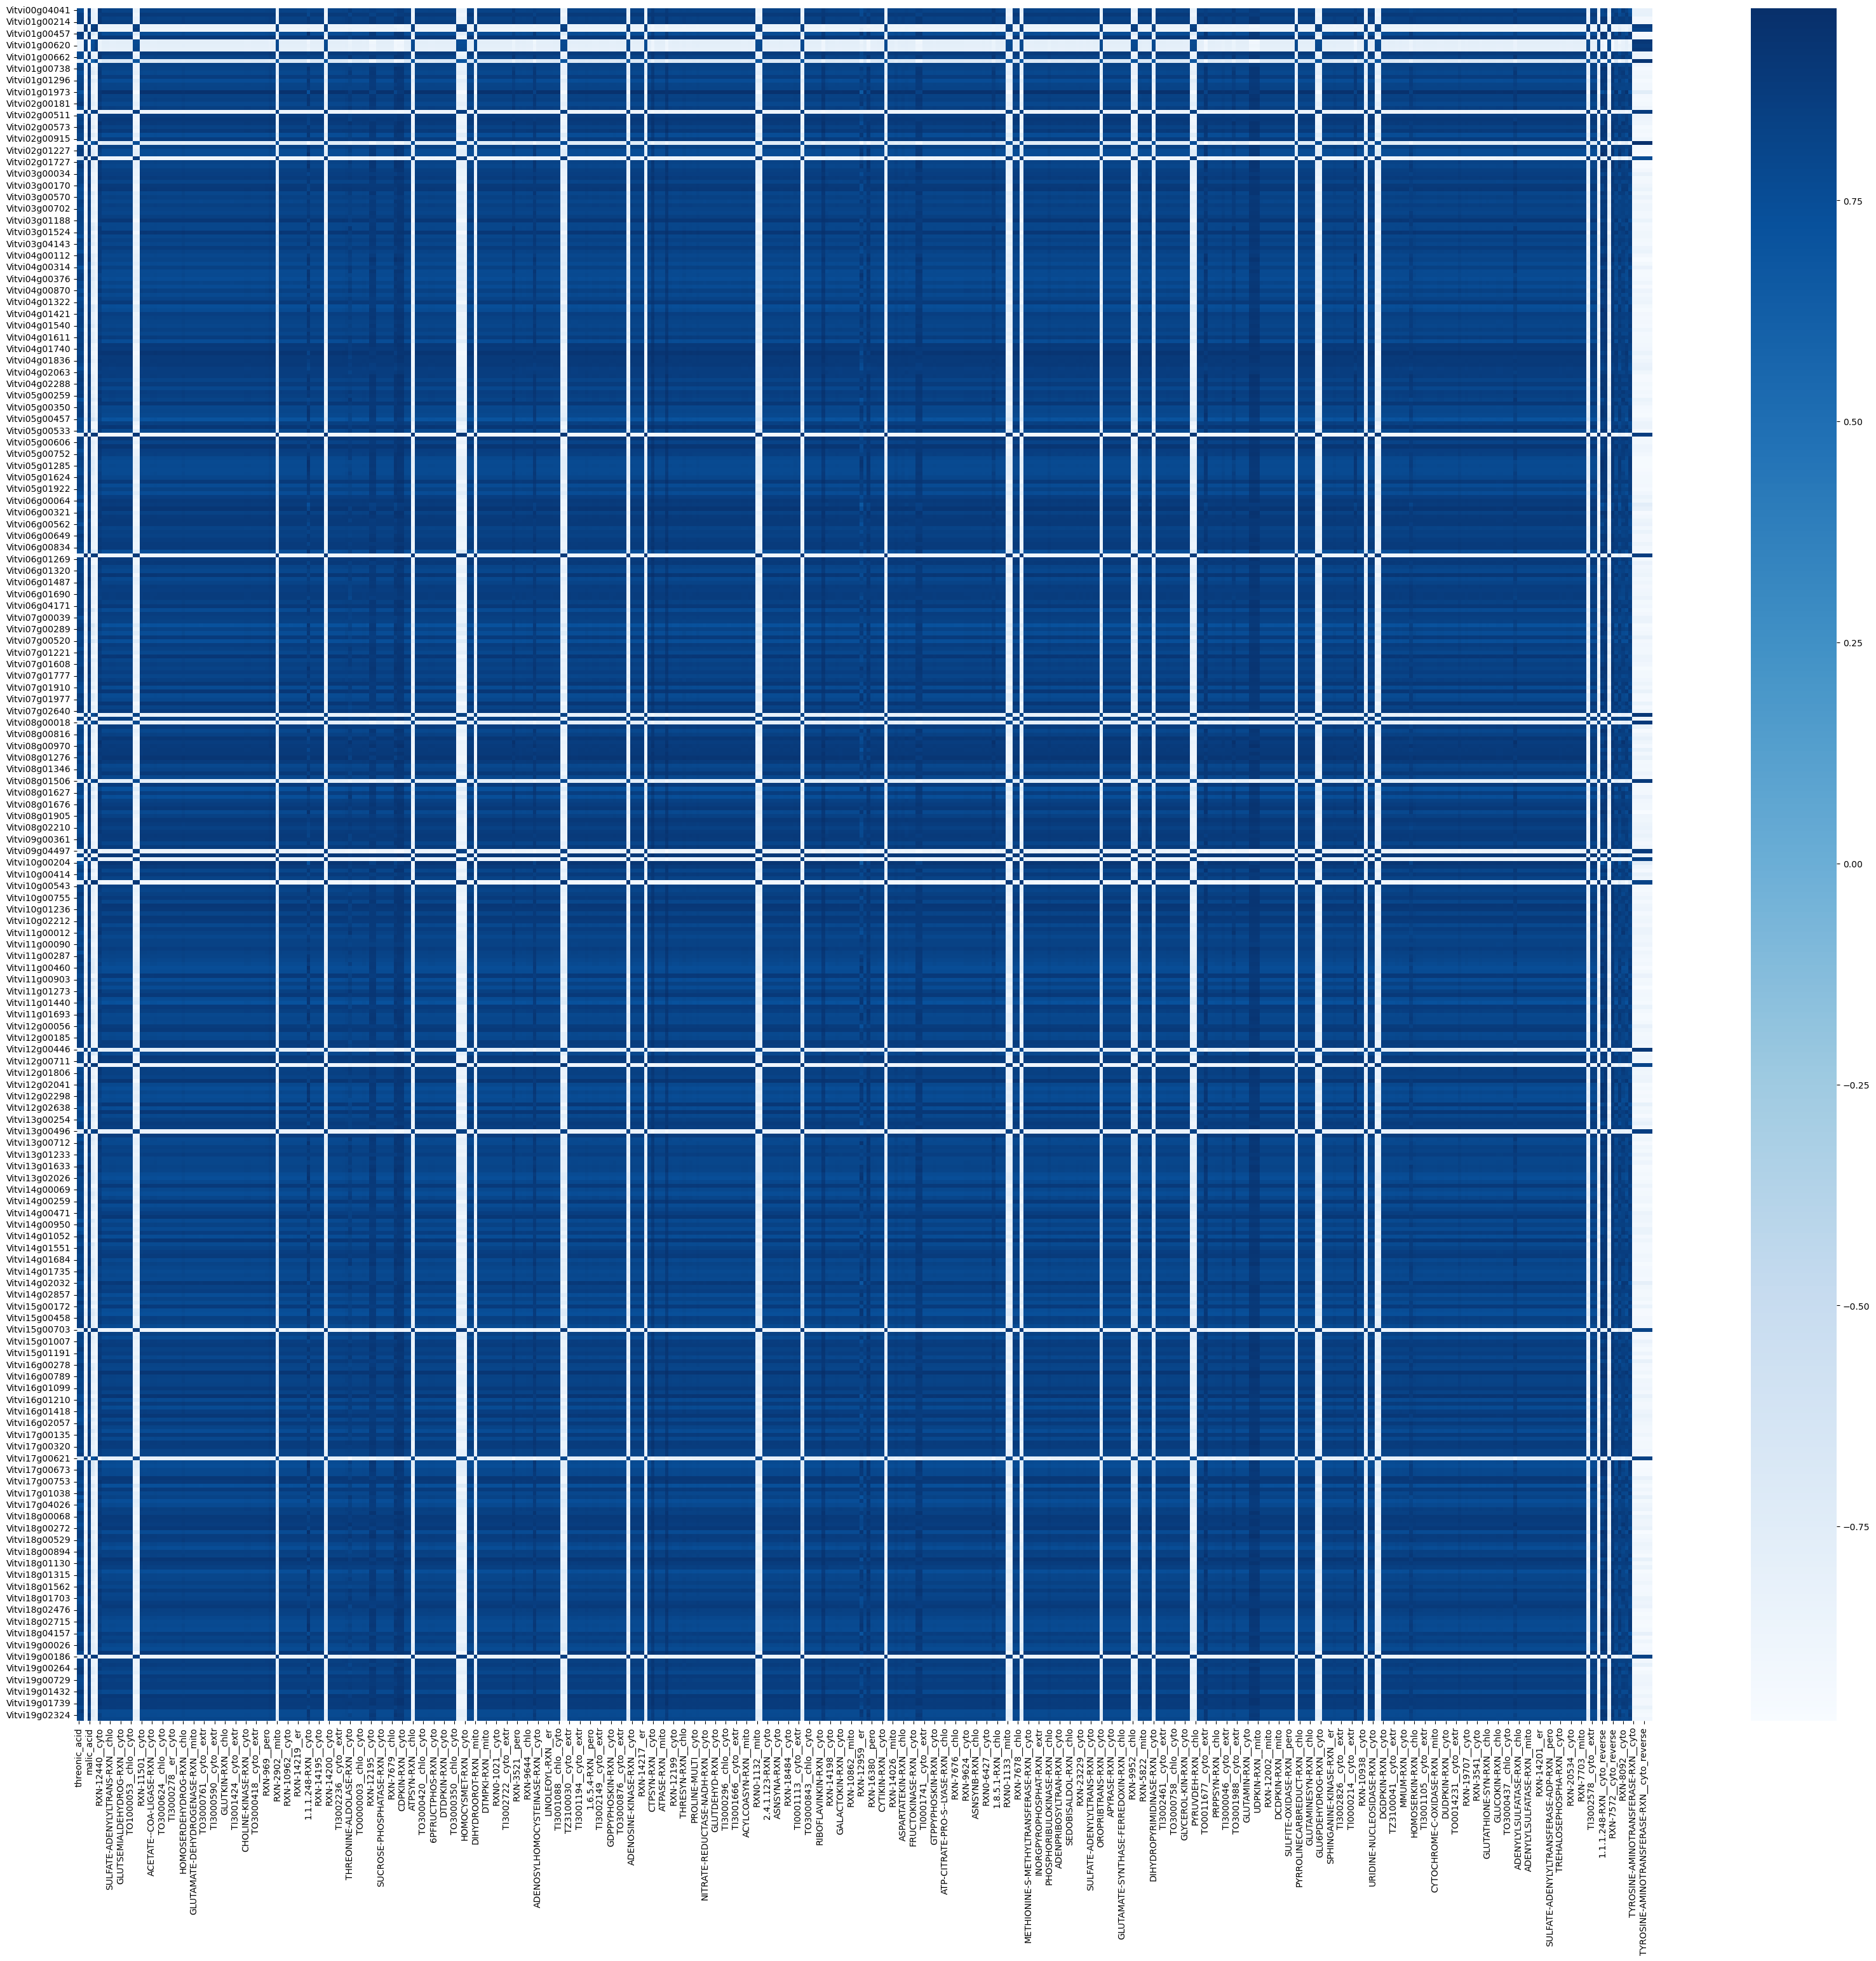

In [119]:
plt.subplots(figsize=(40,35))
sns.heatmap(corr_filter2, cmap='Blues')

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

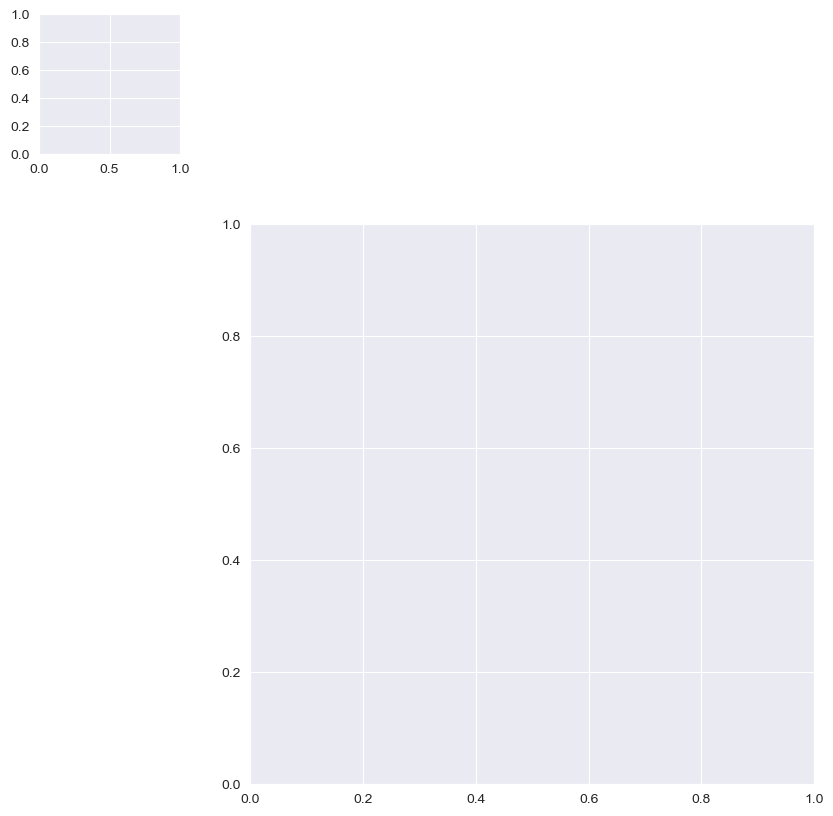

In [8]:
sns.clustermap(all_data, metric="correlation", method="single", cmap="Blues", standard_scale=1)
plt.show()

### Analyse levels over time (ONLY TRAIN DATA)

In [17]:
sort_order_cs = ["CS_time0_2012", "CS_time1_2012", "CS_time2_2012", "CS_time3_2012", "CS_time4_2012", "CS_time5_2012", "CS_time6_2012", "CS_time7_2012", "CS_time8_2012", "CS_time9_2012", "CS_time10_2012", "CS_time11_2012", "CS_time12_2012", "CS_time0_2013", "CS_time1_2013", "CS_time2_2013", "CS_time3_2013", "CS_time4_2013", "CS_time5_2013", "CS_time6_2013", "CS_time7_2013", "CS_time8_2013", "CS_time9_2013", "CS_time10_2013", "CS_time11_2013", "CS_time12_2013", "CS_time13_2013", "CS_time0_2014", "CS_time1_2014", "CS_time2_2014", "CS_time3_2014", "CS_time4_2014", "CS_time5_2014", "CS_time6_2014", "CS_time7_2014", "CS_time8_2014", "CS_time9_2014", "CS_time10_2014", "CS_time11_2014", "CS_time12_2014"]

sort_order_pn = ["PN_time0_2012", "PN_time1_2012", "PN_time2_2012", "PN_time3_2012", "PN_time4_2012", "PN_time5_2012", "PN_time6_2012", "PN_time7_2012", "PN_time8_2012", "PN_time9_2012", "PN_time0_2013", "PN_time1_2013", "PN_time2_2013", "PN_time3_2013", "PN_time4_2013", "PN_time5_2013", "PN_time6_2013", "PN_time7_2013", "PN_time8_2013", "PN_time9_2013", "PN_time10_2013", "PN_time0_2014", "PN_time1_2014", "PN_time2_2014", "PN_time3_2014", "PN_time4_2014", "PN_time5_2014", "PN_time6_2014", "PN_time7_2014", "PN_time8_2014", "PN_time9_2014", "PN_time10_2014", "PN_time11_2014"]

In [45]:
index_cs = [i for i in all_data.index if i.startswith('CS') and i.endswith('12')]
index_pn = [i for i in all_data.index if i.startswith('PN')]

In [46]:
malate_cs = all_data.loc[index_cs, 'malic_acid']
malate_cs

CS_time7_2012    -0.458128
CS_time3_2012     2.047971
CS_time8_2012    -0.616011
CS_time6_2012    -0.161026
CS_time11_2012   -0.960256
CS_time1_2012     0.887736
CS_time2_2012     1.785066
Name: malic_acid, dtype: float64

In [47]:
malate_cs.sort_index(key=lambda column: column.map(lambda e: sort_order_cs.index(e)), inplace=True)
malate_cs

CS_time1_2012     0.887736
CS_time2_2012     1.785066
CS_time3_2012     2.047971
CS_time6_2012    -0.161026
CS_time7_2012    -0.458128
CS_time8_2012    -0.616011
CS_time11_2012   -0.960256
Name: malic_acid, dtype: float64

In [48]:
sucrose_cs = all_data.loc[index_cs, 'sucrose']
sucrose_cs.sort_index(key=lambda column: column.map(lambda e: sort_order_cs.index(e)), inplace=True)

In [49]:
glucose_cs = all_data.loc[index_cs, 'glucose']
glucose_cs.sort_index(key=lambda column: column.map(lambda e: sort_order_cs.index(e)), inplace=True)

In [50]:
Vitvi18g01571_cs = all_data.loc[index_cs, 'Vitvi18g01571']
Vitvi18g01571_cs.sort_index(key=lambda column: column.map(lambda e: sort_order_cs.index(e)), inplace=True)

In [51]:
Vitvi09g04497_cs = all_data.loc[index_cs, 'Vitvi09g04497']
Vitvi09g04497_cs.sort_index(key=lambda column: column.map(lambda e: sort_order_cs.index(e)), inplace=True)

In [52]:
all_mets = pd.concat([malate_cs, sucrose_cs, glucose_cs], axis=1)

In [53]:
all_genes = pd.concat([Vitvi18g01571_cs, Vitvi09g04497_cs], axis=1)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CS_time1_2012'),
  Text(1, 0, 'CS_time2_2012'),
  Text(2, 0, 'CS_time3_2012'),
  Text(3, 0, 'CS_time6_2012'),
  Text(4, 0, 'CS_time7_2012'),
  Text(5, 0, 'CS_time8_2012'),
  Text(6, 0, 'CS_time11_2012')])

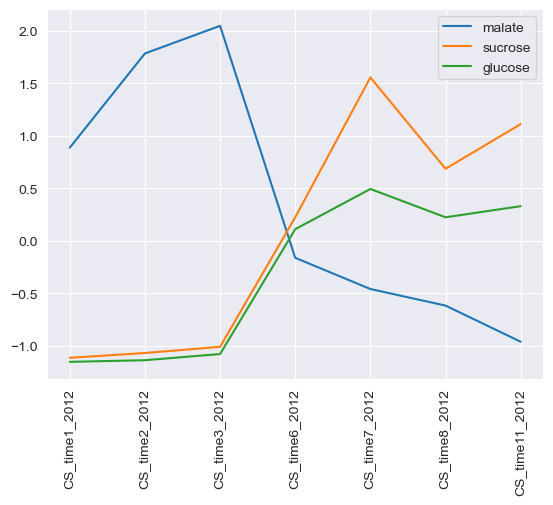

In [54]:
plt.plot(all_mets)
plt.legend(['malate', 'sucrose', 'glucose'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'CS_time1_2012'),
  Text(1, 0, 'CS_time2_2012'),
  Text(2, 0, 'CS_time3_2012'),
  Text(3, 0, 'CS_time6_2012'),
  Text(4, 0, 'CS_time7_2012'),
  Text(5, 0, 'CS_time8_2012'),
  Text(6, 0, 'CS_time11_2012'),
  Text(7, 0, 'CS_time0_2013'),
  Text(8, 0, 'CS_time1_2013'),
  Text(9, 0, 'CS_time2_2013'),
  Text(10, 0, 'CS_time3_2013'),
  Text(11, 0, 'CS_time4_2013'),
  Text(12, 0, 'CS_time6_2013'),
  Text(13, 0, 'CS_time7_2013'),
  Text(14, 0, 'CS_time8_2013'),
  Text(15, 0, 'CS_time9_2013'),
  Text(16, 0, 'CS_time10_2013'),
  Text(17, 0, 'CS_time11_2013'),
  Text(18, 0, 'CS_time12_2013'),
  Text(19, 0, 'CS_time13_2013'),
  Text(20, 0, 'CS_time0_2014'),
  Text(21, 0, 'CS_time2_2014'),
  Text(22, 0, 'CS_time3_2014'),
  Text(23, 0, 'CS_time5_2014'),
  Text(24, 0, 'CS_time6_2014'),
  Text(25, 0, 'CS_time8_2014'),
  

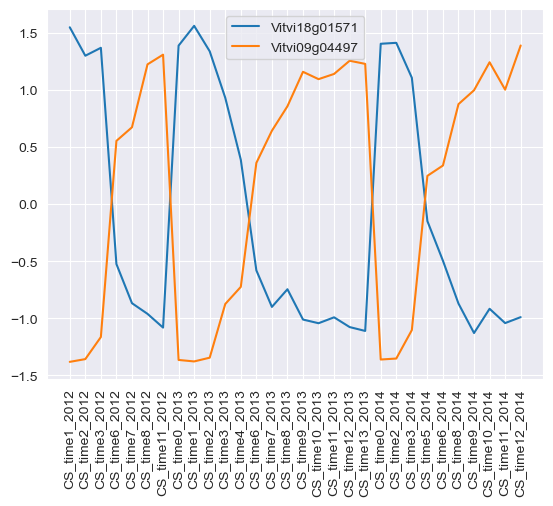

In [44]:
plt.plot(all_genes)
plt.legend(['Vitvi18g01571', 'Vitvi09g04497'])
plt.xticks(rotation=90)

# APPLY ML

In [18]:
data_train = all_data

In [7]:
Xtest_RNASeq = pd.read_csv(os.path.join(data_source, 'XTEST_RNASEQ_MODEL_500_GENES_NOREPS.csv'), index_col=0)

In [8]:
Xtest_mets = pd.read_csv(os.path.join(data_source, 'XTEST_METABOLOMICS_NOREPS.csv'), index_col=0)

In [9]:
Xtest_fluxes = pd.read_csv(os.path.join(data_source, 'XTEST_FLUXOMICS_500_REACTIONS.csv'), index_col=0)

In [17]:
data_test = pd.concat([Xtest_RNASeq, Xtest_mets, Xtest_fluxes], axis=1)
data_test.shape

(15, 1212)

In [21]:
y_train = pd.read_csv(os.path.join(data_source, 'yTRAIN_MODEL_500_GENES_NOREPS.csv'), index_col=0)
y_train.shape

(58, 1)

In [22]:
y_test = pd.read_csv(os.path.join(data_source, 'yTEST_MODEL_500_GENES_NOREPS.csv'), index_col=0)
y_test.shape

(15, 1)

Precision: 0.89
Recall: 0.87
Accuracy: 0.87


[Text(0.5, 0.75, 'x[437] <= -0.025\ngini = 0.485\nsamples = 58\nvalue = [24, 34]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

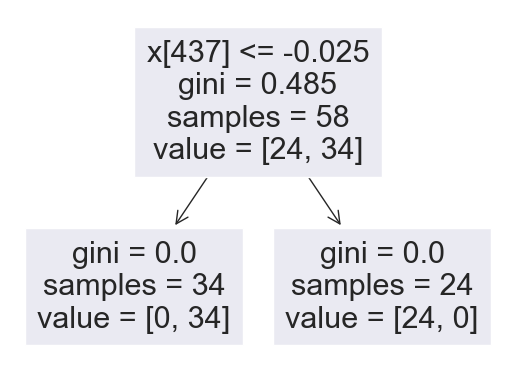

In [23]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(data_train, y_train)

y_pred_tree = clf_tree.predict(data_test)

print('Precision: %0.2f' % precision_score(y_test, y_pred_tree, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_tree, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf_tree)

Precision: 0.89
Recall: 0.87
Accuracy: 0.87


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


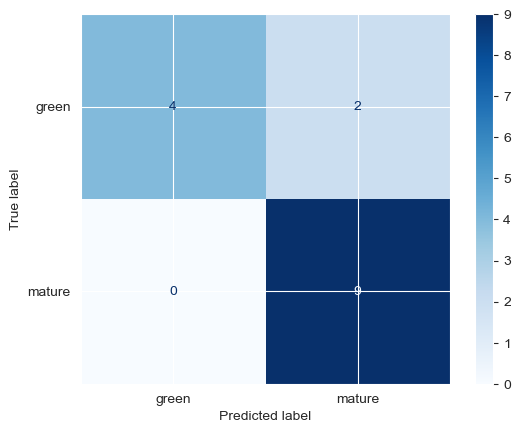

In [26]:
lr = LogisticRegression(random_state=0).fit(data_train, y_train)
y_pred_lr = lr.predict(data_test)

print('Precision: %0.2f' % precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_lr, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_lr))

cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=lr.classes_, cmap='Blues')

Precision: 0.89
Recall: 0.87
Accuracy: 0.87


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


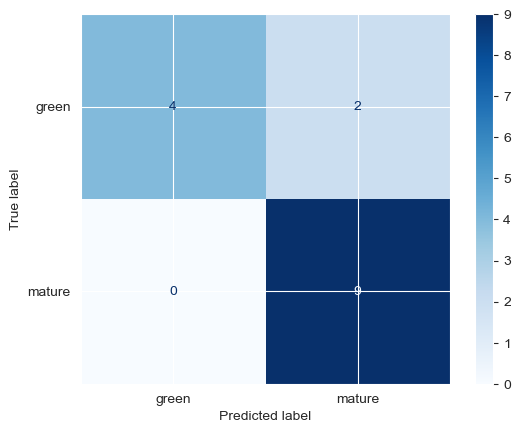

In [27]:
svm_model = svm.SVC()
svm_model.fit(data_train, y_train)

svm_y_pred = svm_model.predict(data_test)

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

Precision: 1.00
Recall: 1.00
Accuracy: 1.00


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


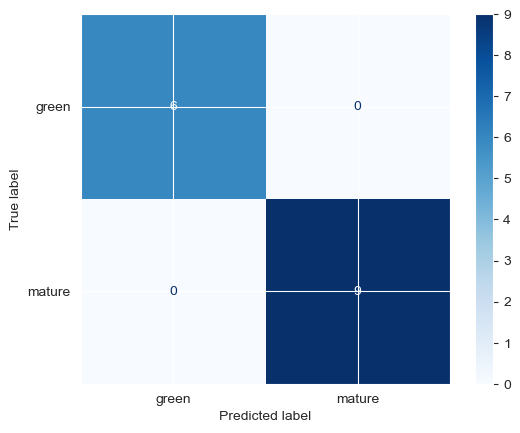

In [29]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(data_train, y_train)

rf_y_pred = rf_model.predict(data_test)

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

rf_cm = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=rf_model.classes_, cmap='Blues')
rf_cm

In [30]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=data_train.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
Vitvi12g00647,0.03
Vitvi19g04395,0.02
Vitvi03g01524,0.02
Vitvi06g00562,0.02
Vitvi04g00367,0.02
...,...
Vitvi18g01022,0.00
Vitvi18g01130,0.00
Vitvi18g01149,0.00
Vitvi18g01218,0.00


In [32]:
data_train.shape

(58, 1212)

In [50]:
kb2 = SelectKBest(f_classif, k=500)

kb2_fit = kb2.fit(data_train, y_train)

train_filtered2 = kb2_fit.transform(data_train)
test_filtered2 = kb2_fit.transform(data_test)

cols_inds = kb2_fit.get_support(indices=True)

X_train_filtered = pd.DataFrame(train_filtered2, columns=data_train.columns[cols_inds], index=data_train.index)
X_train_filtered.shape

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [650 660 672 700] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(58, 500)

In [51]:
X_test_filtered = pd.DataFrame(test_filtered2, columns=data_test.columns[cols_inds], index=data_test.index)
X_test_filtered.shape

(15, 500)

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


[Text(0.5, 0.75, 'x[217] <= 0.066\ngini = 0.485\nsamples = 58\nvalue = [24, 34]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

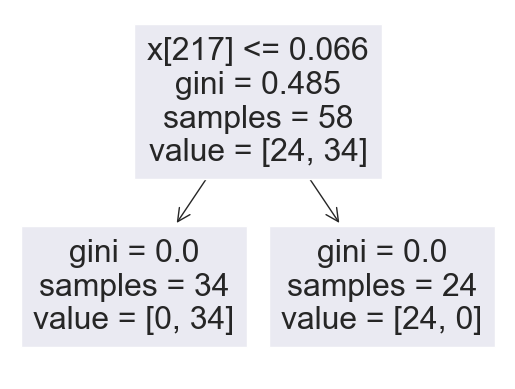

In [52]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train_filtered, y_train)

y_pred_tree = clf_tree.predict(X_test_filtered)

print('Precision: %0.2f' % precision_score(y_test, y_pred_tree, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_tree, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf_tree)

Precision: 1.00
Recall: 1.00
Accuracy: 1.00


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


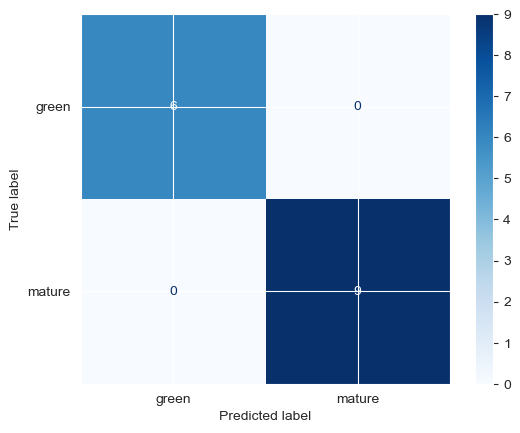

In [53]:
lr = LogisticRegression(random_state=0).fit(X_train_filtered, y_train)
y_pred_lr = lr.predict(X_test_filtered)

print('Precision: %0.2f' % precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_lr, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_lr))

cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=lr.classes_, cmap='Blues')

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


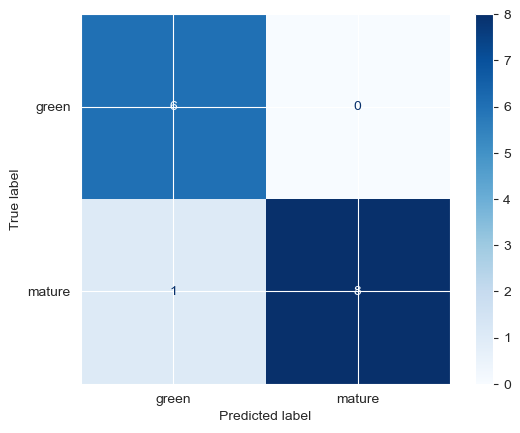

In [55]:
svm_model = svm.SVC()
svm_model.fit(X_train_filtered, y_train)

svm_y_pred = svm_model.predict(X_test_filtered)

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

# MODEL-BASED INTEGRATION

In [58]:
from sklearn.ensemble import VotingClassifier

In [61]:
model_rnaseq = svm.SVC(kernel = "linear").fit(Xtrain_RNASeq, y_train['state'])

In [62]:
model_mets = LogisticRegression().fit(Xtrain_mets, y_train['state'])

In [63]:
model_fluxes = svm.SVC(kernel = "linear").fit(Xtrain_fluxes, y_train['state'])

In [65]:
models = {'rnaseq': model_rnaseq, 'mets': model_mets, 'fluxes': model_fluxes}
datasets = {'rnaseq': Xtest_RNASeq, 'mets': Xtest_mets, 'fluxes': Xtest_fluxes}

In [66]:
results, names = list(), list()
for name, model in models.items():
 preds = model.predict(datasets[name])
 results.append(preds)
 names.append(name)

In [69]:
results

[array(['green', 'green', 'mature', 'green', 'green', 'mature', 'mature',
        'mature', 'mature', 'mature', 'green', 'mature', 'mature',
        'mature', 'mature'], dtype=object),
 array(['green', 'green', 'green', 'green', 'green', 'mature', 'mature',
        'mature', 'mature', 'mature', 'green', 'green', 'mature', 'mature',
        'mature'], dtype=object),
 array(['green', 'green', 'mature', 'green', 'green', 'mature', 'mature',
        'mature', 'mature', 'mature', 'green', 'mature', 'mature',
        'mature', 'mature'], dtype=object)]

In [79]:
ensemble_model = VotingClassifier(estimators=[
    ('rnaseq', model_rnaseq),
    ('mets', model_mets),
    ('fluxes', model_fluxes)], voting='hard')

In [89]:
ensemble_model.fit(data_train, y_train['state'])

VotingClassifier(estimators=[('rnaseq', SVC(kernel='linear')),
                             ('mets', LogisticRegression()),
                             ('fluxes', SVC(kernel='linear'))])

In [90]:
ensemble_predictions = ensemble_model.predict(data_test)

In [91]:
accuracy = accuracy_score(y_test['state'], ensemble_predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.8666666666666667
